# Should $H$ in fact be called the Lemaître Constant?

The exercise sheet introduces the p-value. It gives the rate at which we expect our data to occur given that there is no correlation between distance and velocity. For a p-value of  $p = 1 \cdot 10^{-7}$ this "disagreement" between the data and the hypothesis of no correlation is $5 \sigma$ and we reject the hypothesis that the velocity and distance are not correlated. \
(Note: This statement seems very convoluted which is due to the fact that in statistical data analysis people are veeeery cautious to not make a false claim of discovery.)

Background:
What we want to do here is called Hypothesis testing. This method let's us compare hypotheses that predict certain behaviour of the data. The p-value is a measure of how likely one hypothesis is compared to another. 

First we load the data

In [2]:
import pandas as pd

In [3]:
data = dict()
data['Hubble'] = pd.read_csv('data/velocities_hubble.csv', skipinitialspace=True)
data['Lemaitre'] = pd.read_csv('data/velocities_lemaitre.csv', skipinitialspace=True)

A quick way is to just use `scipy.stats.linregress`. It let's you fit a linear function and gives you also the p-value for a comparison to the hypotheiss of no correlation between the x- and y-values ("slope of 0").

In [4]:
from scipy.stats import linregress

In [5]:
results = dict()
for name, dat in data.items():
    res = linregress(dat.distance, dat.velocity)
    print(name, ': \t p-value:', res.pvalue)
    results[name] = res

Hubble : 	 p-value: 6.886623159958981e-06
Lemaitre : 	 p-value: 0.01740629469929827


We can see that Hubble measured a deviation from "no correlation" of almost $5 \sigma$ while Lemaître did not.

In [13]:
import matplotlib.pyplot as plt
import numpy as np

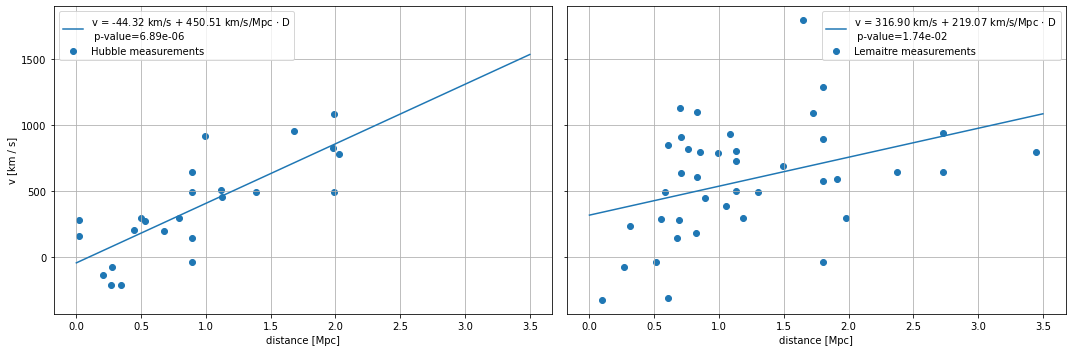

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharex='all', sharey='all')
test_distance = np.linspace(0, 3.5, 100)

for ax, (name, res) in zip(axs, results.items()):
    
    dat = data[name]
    ax.scatter(dat.distance, dat.velocity, label=f"{name} measurements")
    pred_vel = res.intercept + res.slope * test_distance
    ax.plot(test_distance, pred_vel, label=f"v = {res.intercept:.2f} km/s + {res.slope:.2f} km/s/Mpc $\cdot$ D\n p-value={res.pvalue:.2e}")
    ax.legend()
    ax.set_xlabel('distance [Mpc]')
    ax.grid()
    
axs[0].set_ylabel('v [km / s]')

fig.tight_layout()
plt.show()